In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import starry
starry.config.lazy=False
from scipy.linalg import cho_factor, cho_solve

In [3]:
map=starry.Map(10)
map.inc = 65

Pre-computing some matrices... Done.


In [4]:
map.load("earth")

Compiling `render`... Done.


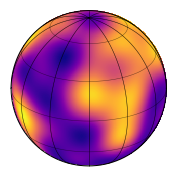

In [5]:
map.show()

In [26]:
true_power = [np.std(map[l, :]) ** 2 for l in range(0, map.ydeg + 1)]

In [29]:
true_power[0] = 1

In [30]:
flat_power = [np.std(map.y[1:]) ** 2 for l in range(0, map.ydeg + 1)]

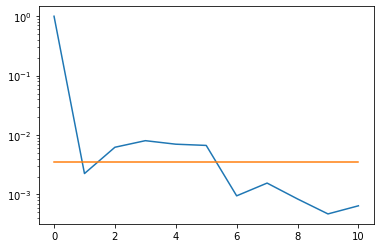

In [31]:
l = range(0, map.ydeg + 1)
plt.plot(l, true_power)
plt.plot(l, flat_power)
plt.yscale("log")

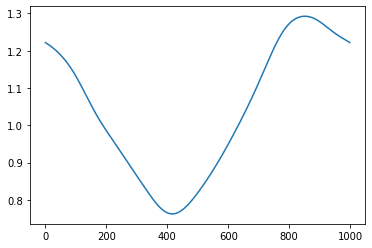

In [32]:
plt.plot(map.flux(theta=np.linspace(0, 360, 1000)))

In [33]:
A = map.design_matrix(theta=np.linspace(0, 360, 1000))

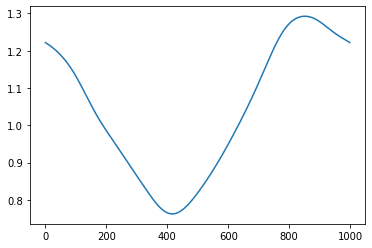

In [34]:
#A.dot(map.y)=flux


plt.plot(A.dot(map.y))


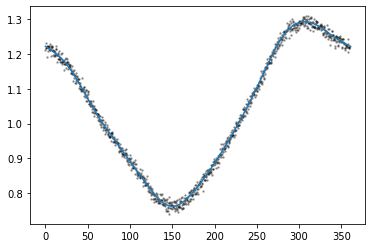

In [35]:
#adding noise to the LC

theta = np.linspace(0, 360, 1000)
flux0 = map.flux(theta=theta)
sigma = 0.01
flux = flux0 + sigma * np.random.randn(1000)

plt.plot(theta, flux, "k.", alpha=0.3, ms=3)
plt.plot(theta, flux0)

In [36]:
AT=A.T

In [37]:
map.ydeg

10

In [38]:
# lam_inv[0]=1
# lam_inv[1:4]=np.random.rand(1)**2
# lam_inv[5:10]=np.random.rand(1)**2
# lam_inv[11:18]=np.random.rand(1)**2
# lam_inv[19:28]=np.random.rand(1)**2
# lam_inv[29:40]=np.random.rand(1)**2
# lam_inv[41:54]=np.random.rand(1)**2
# lam_inv[55:70]=np.random.rand(1)**2
# lam_inv[71:88]=np.random.rand(1)**2
# lam_inv[89:108]=np.random.rand(1)**2
# lam_inv[109:130]=np.random.rand(1)**2

def lam_inv_l(l):
    return 1 / true_power[l]

lam_inv = np.zeros(121)
i = 0
for l in range(0, map.ydeg + 1):
    lam_inv[i:i+2*l + 1] = lam_inv_l(l)
    i += 2 * l + 1

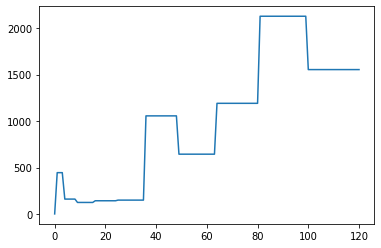

In [39]:
plt.plot(lam_inv)

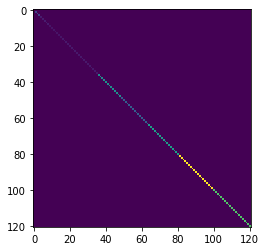

In [40]:
Lam_inv = np.diag(lam_inv)
plt.imshow(Lam_inv)

In [41]:
var=sigma*sigma
inv_var=1/var
AT_inv_var=inv_var*AT
AT_inv_var_A=AT_inv_var.dot(A)

In [42]:
inv_sigmaY=AT_inv_var_A+Lam_inv
ATsf=AT_inv_var.dot(flux.reshape(-1,1))


In [43]:
L=cho_factor(inv_sigmaY)
y_hat=cho_solve(L,ATsf)

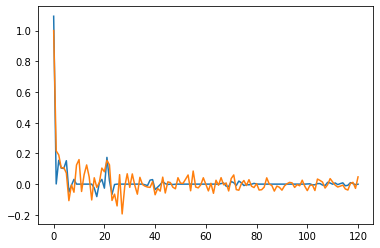

In [44]:
plt.plot(y_hat)
plt.plot(map.y)

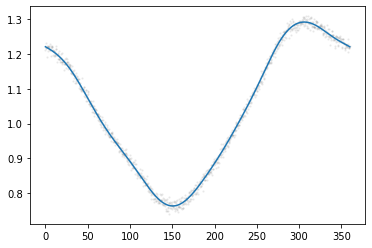

In [45]:
f_hat=A.dot(y_hat)
plt.plot(theta, flux, "k.", alpha=0.05, ms=3)
plt.plot(theta,f_hat)

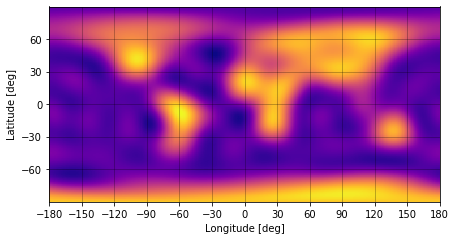

In [46]:
map.show(projection="rect")

Pre-computing some matrices... Done.
Compiling `render`... Done.


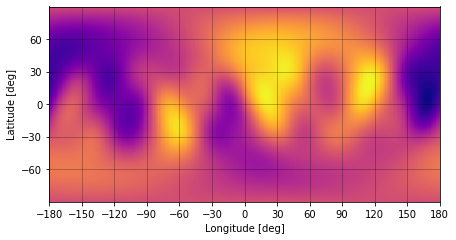

In [47]:
map_inf = starry.Map(10)
map_inf[1:,:]=y_hat.flatten()[1:]
map_inf.show(projection="rect")

In [48]:
I=np.diag(np.ones(121))
sigma_y=cho_solve(L,I)

u=np.random.randn(121)
y_sample=y_hat+(sigma_y*(u.reshape(-1,1)))


In [58]:
x = np.random.randn(100)
#x -= np.mean(x)

In [59]:
np.std(x)

1.0419103010883661

In [60]:
np.sqrt(np.sum((x - x.mean()) ** 2) / 100)

1.0419103010883661